# Tensorflow 이해하기

필자는 본래 R을 많이 써왔던 터라... Python에 대해 지식이 부족했음. 그리고 인공신경망의 이론적 이해는 어느정도 설립이 되어있으나 그걸 직접 구현해 본 적은 없는 상태. 그 상태에서 TF를 이해하기 정말 쉽지 않았음. 기초 확립과 나중에 참고용으로 사용하기 위해 정리 시작.

-------------------

### 우선, Tensorflow가 뭐야?
머신러닝 알고리즘을 구현하고 실행하는 대표적인 프로그래밍 인터페이스. 작성 시기 현재는 2.0버전이라 keras의 구조로 되어 직관적이어 졌다고 하는데, 1.x일 때는 정말 이해하기가 힘들더라...(~~근데 1.x 도 이해를 하고 있어야 하나...? 이젠 안해도 되려나~~)   
요즘은 파이토치라는 것도 나와서 그거에도 흥미를 가지긴 했는데 일단은 이거부터 이해...  
텐서플로의 주요 특징 중 하나는 여러개의 GPU를 사용할 수 있는 기능이다. 그래서 대규모 시스템에서 모델을 효율적으로 훈련할 수 있다. 

In [ ]:
## 당시에 사용하던 환경이 아직 1.14.버전이어서 버전을 업데이트함.
pip install --upgrade tensorflow

In [79]:
import tensorflow as tf

tf.__version__  ## 2.0.0

'2.0.0'

--------
## 1. 텐서플로의 랭크와 텐서 

- **텐서(tensor)** : 데이터를 담고 있는 다차원 배열에 대한 일반화된 수학적 용어
- **랭크(rank)** : 텐서의 차원을 나타내는 표기법

우리는 보통 데이터를 생각할 때, 스칼라 데이터를 1차원 데이터라고 생각했다. 그러나 텐서의 개념에서는 스칼라는 0차원, 랭크 0인 텐서이다. 그리고 벡터는 랭크 1, 행렬은 랭크 2인 텐서이다. 일반적 분석은 보통 여기서 그칠 때가 많았는데, 텐서는 더 고차원으로 일반화될 수 있다. 특히 이미지분석이나, 자연어처리 분야에서는 3차원, 4차원 텐서를 많이 사용한다.


아래는 텐서의 개념을 직관적으로 이해하기 위한 그림이다. 


![image](https://www.tutorialspoint.com/tensorflow/images/tensor_data_structure.jpg)

텐서를 정의할 때 보통 **`tf.constant()`** 를 사용한다.

텐서를 정의하고 랭크를 확인하는 법을 아래에 정리해 보았다. 

In [14]:
import numpy as np

# t1, t2, t3 텐서 정의
t1 = tf.constant(np.pi)
t2 = tf.constant([1,2,3,4])
t3 = tf.constant([[1,2],[3,4]])

## rank 구하기
r1 = tf.rank(t1)
r2 = tf.rank(t2)
r3 = tf.rank(t3)

## 크기 구하기
s1 = t1.get_shape()
s2 = t2.get_shape()
s3 = t3.get_shape()

print('크기: ',s1,s2,s3)
print('랭크: ',r1.numpy(),r2.numpy(),r3.numpy())

크기:  () (4,) (2, 2)
랭크:  0 1 2


In [19]:
## 그냥 t2을 치면 어떻게 나올까
## 텐서의 정보가 나오면서, shape, array형식의 numpy가 나온다.
t2

<tf.Tensor: id=21, shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [22]:
## tensor는 그냥 shape()하면 에러가 나는군.적어도 t3.shape (괄호치지 않기)를 해야한다.
t3.shape

TensorShape([2, 2])

## 2. 텐서를 다차원 배열로 변환하기

종종 텐서의 형태를 변환해야 하는 때가 온다. 그래서 텐서의 형태를 우선 알기 위해 **`tf.get_shape()`**로 텐서의 구조를 알고, **`tf.reshape()`** 를 거쳐 텐서의 구조를 다양하게 변환할 수 있다. 

- **tf.Variable()** : 변수 생성
- **tf.reshape()** : 텐서의 구조 변경

tf.constant와 tf.Variable의 차이가 무엇인지 몰라서 왜 다르게 사용하는지 이해가 되지 않았었는데, 명확한 차이가 있었다.   
`tf.constant`는 상수를 정의함으로써 한번 정해지면 값이 바뀌지 않는다. 그에 반해 `tf.Variable()`은 변수를 정의함으로 값이 바뀔 수 있다. 그래서 그래프를 실행하기 전에 초기화를 반드시 해줘야 한다.(~~tf 2.0 부터는 필요없는듯 하다~~)  참고로 `tf.placeholder()`도 있는데, 그건 그 구조의 텐서 그릇을 만들어 놓는다고 생각하면 될 것 같다.

In [25]:
## 행렬 정의
arr = np.array([[1, 2, 3, 3.5],[4, 5, 6, 6.5],[7, 8, 9, 9.5]])
T1 = tf.constant(arr)

print(T1)

tf.Tensor(
[[1.  2.  3.  3.5]
 [4.  5.  6.  6.5]
 [7.  8.  9.  9.5]], shape=(3, 4), dtype=float64)


In [28]:
s = T1.get_shape()                            ## 텐서의 구조 저장

T2 = tf.Variable(np.random.normal(size = s))  ## 같은 구조의 랜덤 숫자가 있는 텐서 생성
print(T2)

T3 = tf.Variable(np.random.normal(size = s[0])) # T1의 첫번째 shape만 가져오는 텐서 생성
print(T3)

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float64, numpy=
array([[-0.4986922 ,  0.76515099,  0.58030008,  0.69479197],
       [-0.09350516, -0.56045798,  0.46856762,  1.73386214],
       [ 0.3666204 ,  0.64763814,  0.47014847, -0.37672242]])>
<tf.Variable 'Variable:0' shape=(3,) dtype=float64, numpy=array([0.06380211, 0.54121533, 0.18022827])>


In [29]:
## 텐서 구조 변경하기
T4 = tf.reshape(T1, shape = [1,1,-1]) ## -1은 나머지 차원을 구성된 원소를 바탕으로 자동으로 할당되게 한다.
print(T4)

T5 = tf.reshape(T1, shape = [1,3,-1])
print(T5)

tf.Tensor([[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]], shape=(1, 1, 12), dtype=float64)
tf.Tensor(
[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]], shape=(1, 3, 4), dtype=float64)


tf에서 행렬을 전치해야 하는 경우도 있는데, 그럴 때는 **`tf.transepose()`**를 사용한다. 일반적인 전치 연산 외에 **perm = [...]**을 이용하여 원하는 순서대로 차원을 지정하여 바꿀 수도 있다. 

In [30]:
T6 = tf.transpose(T5, perm = [2,1,0])  # 2번째,1번째,0번째 순으로 전치
print(T6)                              # shape : (1,3,4) ---> (4,3,1)

T7 = tf.transpose(T5, perm = [0,2,1])  # 0번째,1번째,2번째 순으로 전치
print(T7)                              # shape : (1,3,4) ---> (1,4,3)

tf.Tensor(
[[[1. ]
  [4. ]
  [7. ]]

 [[2. ]
  [5. ]
  [8. ]]

 [[3. ]
  [6. ]
  [9. ]]

 [[3.5]
  [6.5]
  [9.5]]], shape=(4, 3, 1), dtype=float64)
tf.Tensor(
[[[1.  4.  7. ]
  [2.  5.  8. ]
  [3.  6.  9. ]
  [3.5 6.5 9.5]]], shape=(1, 4, 3), dtype=float64)


텐서를 split하여 리스트로 나눌 수도 있다. 

In [31]:
t5_split = tf.split(T5, num_or_size_splits= 2, axis=2)
t5_split

[<tf.Tensor: id=70, shape=(1, 3, 2), dtype=float64, numpy=
 array([[[1., 2.],
         [4., 5.],
         [7., 8.]]])>,
 <tf.Tensor: id=71, shape=(1, 3, 2), dtype=float64, numpy=
 array([[[3. , 3.5],
         [6. , 6.5],
         [9. , 9.5]]])>]

**`tf.concat`**함수를 사용하여 dtype이 같은 텐서 리스트를 연결할 수도 있다.

In [33]:
t1 = tf.ones(shape = (5,1), dtype = tf.float32)
t2 = tf.zeros(shape = (5,1), dtype = tf.float32)

t3 = tf.concat([t1,t2], axis = 0)  # 0번째 차원 기준 결합
t4 = tf.concat([t1,t2], axis = 1)  # 1번째 차원 기준 결합

print(t3)
print(t4)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(5, 2), dtype=float32)


## 3. 계산 그래프의 이해

텐서플로 2.x 버전에서는 즉시 실행 모드가 기본으로 활성화되어 있기 때문에 계산 그래프를 만들지 않고 빠르게 개발과 테스트를 할 수 있다. 
텐서플로 1.x 버전은 계산 그래프를 만든 후 세션을 통해 그래프를 실행한다.   
>1. 비어 있는 새로운 계산 그래프를 만든다.  
2. 계산 그래프에 노드(텐서와 연산) 을 추가한다.
3. 그래프를 실행한다  
    1) 새로운 세션을 시작한다.  
    2) 그래프에 있는 변수를 초기화한다.  
    3) 이 세션에서 계산 그래프를 실행한다.  
    
그러나 2.x는 **``tf.function``** 데코레이터를 사용하여 일반 파이선 함수를 호출 가능한 그래프 객체로 만든다.

In [34]:
## 그래프 생성하기
@tf.function             # 함수 호출

def simple_func():
    a = tf.constant(1)
    b = tf.constant(2)
    c = tf.constant(3)
    
    z = 2*(a-b) + c
    
    return z

print('2*(a-b)+c =>',simple_func().numpy())

2*(a-b)+c => 1


In [42]:
def simple_func():
    a = tf.constant(1)
    b = tf.constant(2)
    c = tf.constant(3)
    
    z = 2*(a-b) + c
    
    return z

simple_func = tf.function(simple_func)   ## @tf.function 이 아니더라도 이렇게 사용 가능

print('2*(a-b)+c =>',simple_func().numpy())

2*(a-b)+c => 1


In [44]:
## simple_func의 자세한 그래프 정의
con_func = simple_func.get_concrete_function()
con_func.graph.get_operations()

[<tf.Operation 'Const' type=Const>,
 <tf.Operation 'Const_1' type=Const>,
 <tf.Operation 'Const_2' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [45]:
con_func.graph.as_graph_def()

node {
  name: "Const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "Const_1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "Const_2"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "Const"
  input: "Const_1"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32

**`tf.Variable()`**을 사용하여 수식을 만드는데, 텐서플로 2.x에서는 텐서플로 변수가 파이썬 객체 자체가 되어 이전에 초기화 좌정이 없이도 훨씬 다루기 쉽게 되었다. 그러나 그냥 덧셈을 하는 경우 덧셈이 적용된 상수 텐서를 반환한다. 그냥 변수의 값을 올리고 싶으면, assign()함수를 사용한다. 

In [47]:
## 변수 생성하기
w2 = tf.Variable(np.array([[1,2,3,4],
                          [5,6,7,8]]), name = 'w2')
print(w2)

## 변수에 상수를 더하면?
print(w2 + 1)

## 그냥 변수의 값을 증가시키고 싶다면?
w2.assign(w2 + 1)
print(w2)


<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[1, 2, 3, 4],
       [5, 6, 7, 8]])>
tf.Tensor(
[[2 3 4 5]
 [6 7 8 9]], shape=(2, 4), dtype=int64)
<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[2, 3, 4, 5],
       [6, 7, 8, 9]])>


## 4. tf.keras API 

### 1) Sequential Model API

이제 keras에서 머신러닝 모델을 만드는 고급 방법인 함수형 API를 배워보도록 하자. 
Sequential 모델을 층을 순서대로 쌓은 모델을 만든다. Dense층을 쌓음 모델을 만들어 합성곱 층과 순환 층을 적용한다. 우선 간단한 회귀분석 모델을 만들어 보도록 하자.

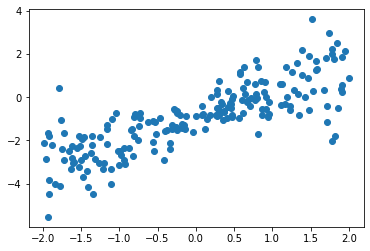

In [49]:
## 랜덤한 회귀용 예제 데이터 셋을 만든다.

import matplotlib.pyplot as plt
np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low = -2, high = 2, size = 200)
    y = []
    for t in x : 
        r = np.random.normal(loc = 0.0, scale = (0.5 + t*t/3), size = None)
        y.append(r)
        
    return x, 1.276*x - 0.84 + np.array(y)

x, y = make_random_data()

plt.plot(x, y, 'o')
plt.show()

In [50]:
## train, test set 나누기
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

In [53]:
## 간단 연결층 하나 만들기
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units = 1, input_dim = 1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


유닛이 하나 뿐이므로 모델 파라미터 개수는 가중치 1개와 절편 두개 뿐이다. 이제 모델을 컴파일하고 훈련 세트에 학습시켜 보도록 하자.

In [56]:
# 경사하강법으로 최적화, 손실함수 기준은 mse라는 것을 명시하며 컴파일
model.compile(optimizer = 'sgd', loss = 'mse')

# 모델 학습 시작
history = model.fit(x_train, y_train, epochs = 500, validation_split = 0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/500
105/105 [==============================] - 1s 6ms/sample - loss: 1.7153 - val_loss: 1.3675
Epoch 2/500
105/105 [==============================] - 0s 211us/sample - loss: 1.5685 - val_loss: 1.2772
Epoch 3/500
105/105 [==============================] - 0s 203us/sample - loss: 1.4407 - val_loss: 1.1992
Epoch 4/500
105/105 [==============================] - 0s 220us/sample - loss: 1.3301 - val_loss: 1.1371
Epoch 5/500
105/105 [==============================] - 0s 233us/sample - loss: 1.2393 - val_loss: 1.0838
Epoch 6/500
105/105 [==============================] - 0s 216us/sample - loss: 1.1626 - val_loss: 1.0420
Epoch 7/500
105/105 [==============================] - 0s 238us/sample - loss: 1.1006 - val_loss: 1.0080
Epoch 8/500
105/105 [==============================] - 0s 193us/sample - loss: 1.0488 - val_loss: 0.9782
Epoch 9/500
105/105 [==============================] - 0s 248us/sample - loss: 1.0027 - val_loss: 0.9511
Epoch 10/500

Epoch 78/500
105/105 [==============================] - 0s 184us/sample - loss: 0.7559 - val_loss: 0.9100
Epoch 79/500
105/105 [==============================] - 0s 200us/sample - loss: 0.7565 - val_loss: 0.9133
Epoch 80/500
105/105 [==============================] - 0s 180us/sample - loss: 0.7562 - val_loss: 0.9126
Epoch 81/500
105/105 [==============================] - 0s 260us/sample - loss: 0.7579 - val_loss: 0.9109
Epoch 82/500
105/105 [==============================] - 0s 312us/sample - loss: 0.7568 - val_loss: 0.9143
Epoch 83/500
105/105 [==============================] - 0s 277us/sample - loss: 0.7580 - val_loss: 0.9140
Epoch 84/500
105/105 [==============================] - 0s 211us/sample - loss: 0.7575 - val_loss: 0.9139
Epoch 85/500
105/105 [==============================] - 0s 282us/sample - loss: 0.7564 - val_loss: 0.9123
Epoch 86/500
105/105 [==============================] - 0s 174us/sample - loss: 0.7569 - val_loss: 0.9111
Epoch 87/500
105/105 [========================

Epoch 155/500
105/105 [==============================] - 0s 221us/sample - loss: 0.7569 - val_loss: 0.9170
Epoch 156/500
105/105 [==============================] - 0s 223us/sample - loss: 0.7575 - val_loss: 0.9162
Epoch 157/500
105/105 [==============================] - 0s 266us/sample - loss: 0.7569 - val_loss: 0.9186
Epoch 158/500
105/105 [==============================] - 0s 197us/sample - loss: 0.7590 - val_loss: 0.9196
Epoch 159/500
105/105 [==============================] - 0s 235us/sample - loss: 0.7585 - val_loss: 0.9158
Epoch 160/500
105/105 [==============================] - 0s 205us/sample - loss: 0.7574 - val_loss: 0.9115
Epoch 161/500
105/105 [==============================] - 0s 267us/sample - loss: 0.7571 - val_loss: 0.9117
Epoch 162/500
105/105 [==============================] - 0s 249us/sample - loss: 0.7563 - val_loss: 0.9140
Epoch 163/500
105/105 [==============================] - 0s 207us/sample - loss: 0.7569 - val_loss: 0.9141
Epoch 164/500
105/105 [==============

105/105 [==============================] - 0s 236us/sample - loss: 0.7564 - val_loss: 0.9006
Epoch 232/500
105/105 [==============================] - 0s 239us/sample - loss: 0.7559 - val_loss: 0.8994
Epoch 233/500
105/105 [==============================] - 0s 182us/sample - loss: 0.7566 - val_loss: 0.9005
Epoch 234/500
105/105 [==============================] - 0s 248us/sample - loss: 0.7559 - val_loss: 0.8993
Epoch 235/500
105/105 [==============================] - 0s 205us/sample - loss: 0.7563 - val_loss: 0.8965
Epoch 236/500
105/105 [==============================] - 0s 311us/sample - loss: 0.7572 - val_loss: 0.8974
Epoch 237/500
105/105 [==============================] - 0s 266us/sample - loss: 0.7568 - val_loss: 0.8946
Epoch 238/500
105/105 [==============================] - 0s 269us/sample - loss: 0.7588 - val_loss: 0.9005
Epoch 239/500
105/105 [==============================] - 0s 205us/sample - loss: 0.7575 - val_loss: 0.8999
Epoch 240/500
105/105 [============================

105/105 [==============================] - 0s 182us/sample - loss: 0.7568 - val_loss: 0.9086
Epoch 308/500
105/105 [==============================] - 0s 216us/sample - loss: 0.7571 - val_loss: 0.9071
Epoch 309/500
105/105 [==============================] - 0s 196us/sample - loss: 0.7574 - val_loss: 0.9067
Epoch 310/500
105/105 [==============================] - 0s 216us/sample - loss: 0.7568 - val_loss: 0.9113
Epoch 311/500
105/105 [==============================] - 0s 237us/sample - loss: 0.7561 - val_loss: 0.9112
Epoch 312/500
105/105 [==============================] - 0s 189us/sample - loss: 0.7570 - val_loss: 0.9151
Epoch 313/500
105/105 [==============================] - 0s 232us/sample - loss: 0.7568 - val_loss: 0.9159
Epoch 314/500
105/105 [==============================] - 0s 232us/sample - loss: 0.7566 - val_loss: 0.9145
Epoch 315/500
105/105 [==============================] - 0s 283us/sample - loss: 0.7569 - val_loss: 0.9118
Epoch 316/500
105/105 [============================

105/105 [==============================] - 0s 314us/sample - loss: 0.7564 - val_loss: 0.9021
Epoch 384/500
105/105 [==============================] - 0s 427us/sample - loss: 0.7569 - val_loss: 0.9036
Epoch 385/500
105/105 [==============================] - 0s 347us/sample - loss: 0.7569 - val_loss: 0.9025
Epoch 386/500
105/105 [==============================] - 0s 218us/sample - loss: 0.7560 - val_loss: 0.9025
Epoch 387/500
105/105 [==============================] - 0s 345us/sample - loss: 0.7566 - val_loss: 0.9039
Epoch 388/500
105/105 [==============================] - 0s 329us/sample - loss: 0.7568 - val_loss: 0.9090
Epoch 389/500
105/105 [==============================] - 0s 234us/sample - loss: 0.7567 - val_loss: 0.9051
Epoch 390/500
105/105 [==============================] - 0s 440us/sample - loss: 0.7561 - val_loss: 0.9060
Epoch 391/500
105/105 [==============================] - 0s 387us/sample - loss: 0.7561 - val_loss: 0.9032
Epoch 392/500
105/105 [============================

105/105 [==============================] - 0s 253us/sample - loss: 0.7561 - val_loss: 0.9083
Epoch 460/500
105/105 [==============================] - 0s 332us/sample - loss: 0.7570 - val_loss: 0.9126
Epoch 461/500
105/105 [==============================] - 0s 271us/sample - loss: 0.7575 - val_loss: 0.9172
Epoch 462/500
105/105 [==============================] - 0s 272us/sample - loss: 0.7572 - val_loss: 0.9149
Epoch 463/500
105/105 [==============================] - 0s 209us/sample - loss: 0.7568 - val_loss: 0.9111
Epoch 464/500
105/105 [==============================] - 0s 204us/sample - loss: 0.7562 - val_loss: 0.9114
Epoch 465/500
105/105 [==============================] - 0s 219us/sample - loss: 0.7580 - val_loss: 0.9089
Epoch 466/500
105/105 [==============================] - 0s 228us/sample - loss: 0.7569 - val_loss: 0.9084
Epoch 467/500
105/105 [==============================] - 0s 208us/sample - loss: 0.7574 - val_loss: 0.9089
Epoch 468/500
105/105 [============================

- **`compile()`** : 모델을 기계가 이해할 수 있도록 컴파일
    * `optimizer` : 훈련 과정을 설정하는 옵티마이저를 생성, 'adam'이나 'sgd'같이 문자열로 지정할 수도 있다.
        - 종류 : `rmsprop`, `adagrad`, `adam`,`sgd` 등...
    * `loss` : 훈련 과정에서 사용할 손실함수를 설정
        - 종류 : `mse`, `mae` ,`crossentropy` 등...
    * `metrixs` : 훈련을 모니터링하기 위한 지표를 선택한다.

대표적으로 사용되는 손실함수와 활성화 함수의 조합은 아래와 같음

문제 유형 | 손실 함수명 | 출력층의 활성화 함수명 |
----------|------------|-------------------------|
회귀 문제 | mean_squard_error(평균 제곱 오차, MSE)|- |
다중 클래스 분류 | categorical_crossentrooy(범주형 교차 엔트로피) | 소프트맥스(softmax) |
다중 클래스 분류 | sparse_categorical_crossentropy | 소프트맥스(softmax) |
이진 분류 | binary_crossentropy(이항 교차 엔트로피)| 시그모이드(sigmoid) |



* **`fit()`**  : 모델을 학습한다. 모델이 오차로부터 매개변수를 업데이트 시키는 과정을 학습, 훈련, 또는 적합(fitting)이라고 하기도 하는데, 모델이 데이터에 적합해가는 과정이기 때문이다. 그런 의미로 fit()은 모델의 훈련을 시작한다는 의미를 가지고 있다. 
    - 첫번째 인자 : 훈련 데이터에 해당한다. (X 변수)
    - 두번째 인자 : 지도 학습에서 레이블 데이터에 해당한다. ( 훈련 데이터의 target)
    - epochs : 에포크. 에포크 1은 전체 데이ㅌ를 한차례 훑고 지나감을 의미. 정수값 기재 필요. 총 훈련 횟수를 정의한다. 
    - batch_size : 배치 크기. 기본값은 32. 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size = None을 기재한다.

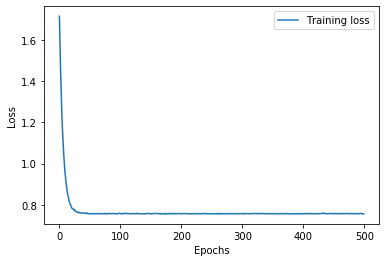

In [69]:
epochs = history.epoch

plt.plot(epochs, history.history['loss'], label = 'Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [66]:
history.history.get

<function dict.get(key, default=None, /)>

### 2) functional API (함수형 API)

Sequential 모델은 층을 순섣로 쌓은 네트워크를 만든다. 그래서 단순한 Feed-foward 신경망밖에 만들지 못한다. 더 복잡한 모델을 만들려면 함수형 API를 사용해야 한다. 함수형 API는 입력과 출력 사이에 원하는 층을 자유롭게 조합할 수 있다. 

In [70]:
from tensorflow.keras import Model, Input

input = tf.keras.Input(shape = (1,))
output = tf.keras.layers.Dense(1)(input)

마지막 코드는 다음과 같이 쓸수도 있다.

In [72]:
dense = tf.keras.layers.Dense(1)
output = dense(input)

## or
## dense = tf.keras.layers.Dense(1)
## output = dense.__call__(input)

In [73]:
model = tf.keras.Model(input, output)

In [76]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Sequential 모델에는 없었던 InputLayer는 입력데이터를 위한 층이다. 이 층은 학습되는 파라미터를 가지고 있지 않다. Sequential 모델은 보여지지 않을 뿐이지 inputLayer를 자동으로 가지고 있다.  컴파일 및 training 단계는 Sequential 모델과 완전히 동일하다. 

In [77]:
model.compile(optimizer = 'sgd', loss = 'mse')
history = model.fit(x_train, y_train, epochs = 500, validation_split = 0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/500
105/105 [==============================] - 0s 3ms/sample - loss: 7.3637 - val_loss: 4.4197
Epoch 2/500
105/105 [==============================] - 0s 239us/sample - loss: 6.0936 - val_loss: 3.7512
Epoch 3/500
105/105 [==============================] - 0s 224us/sample - loss: 5.0797 - val_loss: 3.2123
Epoch 4/500
105/105 [==============================] - 0s 175us/sample - loss: 4.2236 - val_loss: 2.7288
Epoch 5/500
105/105 [==============================] - 0s 200us/sample - loss: 3.4980 - val_loss: 2.4037
Epoch 6/500
105/105 [==============================] - 0s 233us/sample - loss: 2.9921 - val_loss: 2.0766
Epoch 7/500
105/105 [==============================] - 0s 266us/sample - loss: 2.5061 - val_loss: 1.8619
Epoch 8/500
105/105 [==============================] - 0s 238us/sample - loss: 2.1751 - val_loss: 1.6791
Epoch 9/500
105/105 [==============================] - 0s 232us/sample - loss: 1.9031 - val_loss: 1.5444
Epoch 10/500

Epoch 78/500
105/105 [==============================] - 0s 219us/sample - loss: 0.7567 - val_loss: 0.9102
Epoch 79/500
105/105 [==============================] - 0s 196us/sample - loss: 0.7563 - val_loss: 0.9133
Epoch 80/500
105/105 [==============================] - 0s 223us/sample - loss: 0.7584 - val_loss: 0.9112
Epoch 81/500
105/105 [==============================] - 0s 240us/sample - loss: 0.7561 - val_loss: 0.9096
Epoch 82/500
105/105 [==============================] - 0s 287us/sample - loss: 0.7561 - val_loss: 0.9092
Epoch 83/500
105/105 [==============================] - 0s 214us/sample - loss: 0.7571 - val_loss: 0.9072
Epoch 84/500
105/105 [==============================] - 0s 226us/sample - loss: 0.7573 - val_loss: 0.9058
Epoch 85/500
105/105 [==============================] - 0s 231us/sample - loss: 0.7576 - val_loss: 0.9033
Epoch 86/500
105/105 [==============================] - 0s 277us/sample - loss: 0.7572 - val_loss: 0.9043
Epoch 87/500
105/105 [========================

Epoch 155/500
105/105 [==============================] - 0s 176us/sample - loss: 0.7557 - val_loss: 0.9028
Epoch 156/500
105/105 [==============================] - 0s 231us/sample - loss: 0.7565 - val_loss: 0.9018
Epoch 157/500
105/105 [==============================] - 0s 255us/sample - loss: 0.7558 - val_loss: 0.8993
Epoch 158/500
105/105 [==============================] - 0s 279us/sample - loss: 0.7564 - val_loss: 0.8980
Epoch 159/500
105/105 [==============================] - 0s 235us/sample - loss: 0.7574 - val_loss: 0.8982
Epoch 160/500
105/105 [==============================] - 0s 178us/sample - loss: 0.7566 - val_loss: 0.8952
Epoch 161/500
105/105 [==============================] - 0s 235us/sample - loss: 0.7565 - val_loss: 0.8985
Epoch 162/500
105/105 [==============================] - 0s 174us/sample - loss: 0.7572 - val_loss: 0.8985
Epoch 163/500
105/105 [==============================] - 0s 213us/sample - loss: 0.7557 - val_loss: 0.8984
Epoch 164/500
105/105 [==============

105/105 [==============================] - 0s 298us/sample - loss: 0.7567 - val_loss: 0.9045
Epoch 232/500
105/105 [==============================] - 0s 191us/sample - loss: 0.7564 - val_loss: 0.9041
Epoch 233/500
105/105 [==============================] - 0s 205us/sample - loss: 0.7566 - val_loss: 0.9013
Epoch 234/500
105/105 [==============================] - 0s 206us/sample - loss: 0.7561 - val_loss: 0.8993
Epoch 235/500
105/105 [==============================] - 0s 251us/sample - loss: 0.7569 - val_loss: 0.8985
Epoch 236/500
105/105 [==============================] - 0s 233us/sample - loss: 0.7567 - val_loss: 0.8950
Epoch 237/500
105/105 [==============================] - 0s 246us/sample - loss: 0.7586 - val_loss: 0.8977
Epoch 238/500
105/105 [==============================] - 0s 195us/sample - loss: 0.7559 - val_loss: 0.8985
Epoch 239/500
105/105 [==============================] - 0s 213us/sample - loss: 0.7578 - val_loss: 0.8972
Epoch 240/500
105/105 [============================

105/105 [==============================] - 0s 321us/sample - loss: 0.7565 - val_loss: 0.9112
Epoch 308/500
105/105 [==============================] - 0s 184us/sample - loss: 0.7570 - val_loss: 0.9126
Epoch 309/500
105/105 [==============================] - 0s 205us/sample - loss: 0.7563 - val_loss: 0.9123
Epoch 310/500
105/105 [==============================] - 0s 187us/sample - loss: 0.7576 - val_loss: 0.9242
Epoch 311/500
105/105 [==============================] - 0s 215us/sample - loss: 0.7577 - val_loss: 0.9235
Epoch 312/500
105/105 [==============================] - 0s 225us/sample - loss: 0.7578 - val_loss: 0.9185
Epoch 313/500
105/105 [==============================] - 0s 229us/sample - loss: 0.7570 - val_loss: 0.9147
Epoch 314/500
105/105 [==============================] - 0s 221us/sample - loss: 0.7567 - val_loss: 0.9150
Epoch 315/500
105/105 [==============================] - 0s 190us/sample - loss: 0.7567 - val_loss: 0.9168
Epoch 316/500
105/105 [============================

105/105 [==============================] - 0s 314us/sample - loss: 0.7565 - val_loss: 0.9073
Epoch 384/500
105/105 [==============================] - 0s 276us/sample - loss: 0.7569 - val_loss: 0.9057
Epoch 385/500
105/105 [==============================] - 0s 216us/sample - loss: 0.7585 - val_loss: 0.9090
Epoch 386/500
105/105 [==============================] - 0s 224us/sample - loss: 0.7563 - val_loss: 0.9128
Epoch 387/500
105/105 [==============================] - 0s 228us/sample - loss: 0.7562 - val_loss: 0.9119
Epoch 388/500
105/105 [==============================] - 0s 234us/sample - loss: 0.7567 - val_loss: 0.9092
Epoch 389/500
105/105 [==============================] - 0s 229us/sample - loss: 0.7566 - val_loss: 0.9089
Epoch 390/500
105/105 [==============================] - 0s 264us/sample - loss: 0.7560 - val_loss: 0.9080
Epoch 391/500
105/105 [==============================] - 0s 268us/sample - loss: 0.7565 - val_loss: 0.9070
Epoch 392/500
105/105 [============================

105/105 [==============================] - 0s 245us/sample - loss: 0.7577 - val_loss: 0.9092
Epoch 460/500
105/105 [==============================] - 0s 251us/sample - loss: 0.7559 - val_loss: 0.9089
Epoch 461/500
105/105 [==============================] - 0s 320us/sample - loss: 0.7560 - val_loss: 0.9116
Epoch 462/500
105/105 [==============================] - 0s 279us/sample - loss: 0.7575 - val_loss: 0.9103
Epoch 463/500
105/105 [==============================] - 0s 293us/sample - loss: 0.7559 - val_loss: 0.9126
Epoch 464/500
105/105 [==============================] - 0s 234us/sample - loss: 0.7565 - val_loss: 0.9125
Epoch 465/500
105/105 [==============================] - 0s 199us/sample - loss: 0.7567 - val_loss: 0.9110
Epoch 466/500
105/105 [==============================] - 0s 264us/sample - loss: 0.7559 - val_loss: 0.9140
Epoch 467/500
105/105 [==============================] - 0s 262us/sample - loss: 0.7563 - val_loss: 0.9123
Epoch 468/500
105/105 [============================

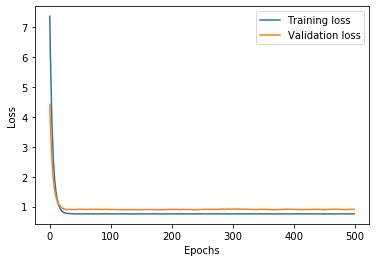

In [92]:
epochs = history.epoch

plt.plot(epochs, history.history['loss'], label = 'Training loss')
plt.plot(epochs, history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 3) tf.keras 모델의 저장과 복원

In [96]:
## model save
model.save_weights('simple_weights.h5')

## model load
model.load_weights('simple_weights.h5')

In [97]:
##  모델 실행
model.evaluate(x_test, y_test)

50/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.9460647058486938